In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

### 1 Descriptive Statistics

In [82]:
df = pd.read_csv("data/complaints_2018-01-01_2024-09-27_BOA.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data/complaints_2018-01-01_2024-09-27_BOA.csv'

In [ ]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/24/24,Vehicle loan or lease,Loan,Problems at the end of the loan or lease,Unable to receive car title or other problem a...,NaN,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",FL,32835,NaN,Consent not provided,Web,05/25/24,Closed with non-monetary relief,Yes,NaN,9095672
1,09/12/24,Checking or savings account,Checking account,Opening an account,Unable to open an account,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",NY,11691,NaN,NaN,Phone,09/12/24,In progress,Yes,NaN,10100450
2,07/16/24,"Money transfer, virtual currency, or money ser...",Domestic (US) money transfer,Fraud or scam,NaN,Background - I wanted to report about a fraud ...,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",NJ,07302,NaN,Consent provided,Web,07/16/24,Closed with explanation,Yes,NaN,9519835
3,03/17/24,Prepaid card,General-purpose prepaid card,Unexpected or other fees,NaN,NaN,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA,92410,NaN,Consent not provided,Web,03/19/24,Closed with explanation,Yes,NaN,8563486
4,06/17/24,Checking or savings account,Checking account,Problem with a lender or other company chargin...,Transaction was not authorized,NaN,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA,92104,NaN,Consent not provided,Web,06/17/24,Closed with explanation,Yes,NaN,9283081


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73845 entries, 0 to 73844
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date received                 73845 non-null  object 
 1   Product                       73845 non-null  object 
 2   Sub-product                   73837 non-null  object 
 3   Issue                         73844 non-null  object 
 4   Sub-issue                     62803 non-null  object 
 5   Consumer complaint narrative  33681 non-null  object 
 6   Company public response       71777 non-null  object 
 7   Company                       73845 non-null  object 
 8   State                         71926 non-null  object 
 9   ZIP code                      72474 non-null  object 
 10  Tags                          10897 non-null  object 
 11  Consumer consent provided?    54177 non-null  object 
 12  Submitted via                 73845 non-null  object 
 13  D

'date_received' and 'date_sent_to_company' should be in datatime format instead of object

In [ ]:
df.shape

(73845, 18)

In [ ]:
df.nunique()

Date received                    2459
Product                            14
Sub-product                        53
Issue                              85
Sub-issue                         192
Consumer complaint narrative    33318
Company public response             6
Company                             1
State                              59
ZIP code                        10788
Tags                                3
Consumer consent provided?          4
Submitted via                       7
Date sent to company             2457
Company response to consumer        5
Timely response?                    2
Consumer disputed?                  0
Complaint ID                    73845
dtype: int64

In [ ]:
df.isna().sum()

Date received                       0
Product                             0
Sub-product                         8
Issue                               1
Sub-issue                       11042
Consumer complaint narrative    40164
Company public response          2068
Company                             0
State                            1919
ZIP code                         1371
Tags                            62948
Consumer consent provided?      19668
Submitted via                       0
Date sent to company                0
Company response to consumer        0
Timely response?                    0
Consumer disputed?              73845
Complaint ID                        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
missing_percentage = round((df.isna().sum()/len(df)*100),2).sort_values(ascending=False)

Text(0.5, 1.0, 'Percentage of missing values in each variable')

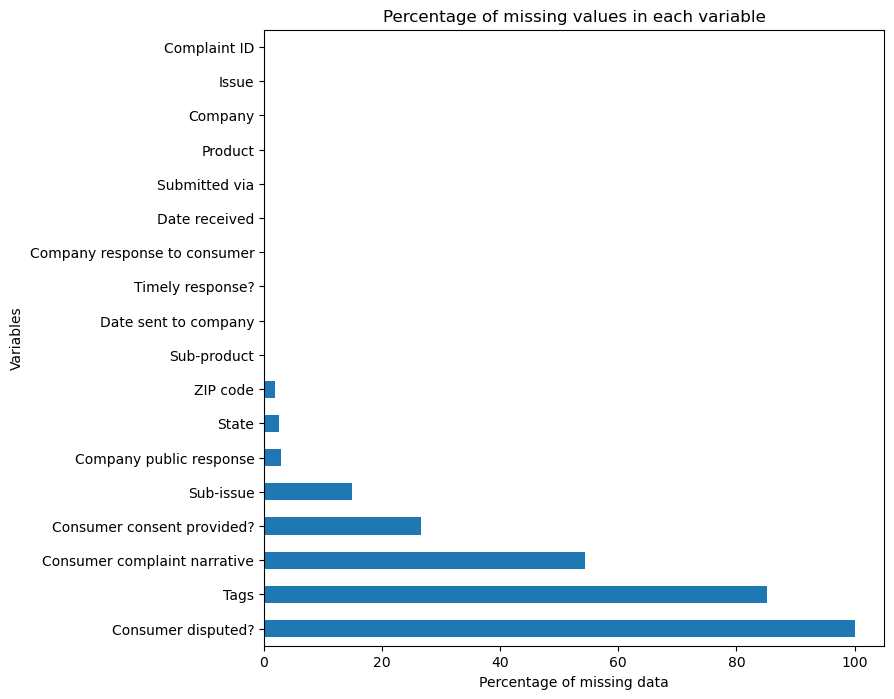

In [ ]:
# Graph showing the percentage of missing data
plt.figure(figsize=(8,8))
missing_percentage.plot(kind='barh')
plt.xlabel('Percentage of missing data')
plt.ylabel('Variables')
plt.title('Percentage of missing values in each variable')

In [ ]:
df['Product'].unique()

array(['Vehicle loan or lease', 'Checking or savings account',
       'Money transfer, virtual currency, or money service',
       'Prepaid card', 'Credit card',
       'Credit reporting or other personal consumer reports',
       'Debt collection', 'Mortgage', 'Credit card or prepaid card',
       'Payday loan, title loan, personal loan, or advance loan',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Debt or credit management',
       'Payday loan, title loan, or personal loan', 'Student loan'],
      dtype=object)

In [ ]:
for col in df.select_dtypes(include=['object']).columns.to_list():
    num_unique = df[col].nunique()
    print(f"number of unique values for \"{col}\" is {num_unique}")
    
    value_counts = df[col].value_counts(normalize=True).head(10)*100
    data = []
    for value, percentage in value_counts.items():
        data.append([value, f"{percentage:.2f}%"])
    headers = ["Value", "Percentage"]
    print(tabulate(data, headers=headers, tablefmt="pretty"))
    

number of unique values for "Date received" is 2459
+----------+------------+
|  Value   | Percentage |
+----------+------------+
| 07/12/23 |   0.25%    |
| 07/13/23 |   0.20%    |
| 07/11/23 |   0.15%    |
| 07/14/23 |   0.14%    |
| 07/15/23 |   0.11%    |
| 07/17/23 |   0.10%    |
| 04/27/23 |   0.10%    |
| 04/05/18 |   0.09%    |
| 07/18/23 |   0.09%    |
| 09/05/24 |   0.09%    |
+----------+------------+
number of unique values for "Product" is 14
+------------------------------------------------------------------------------+------------+
|                                    Value                                     | Percentage |
+------------------------------------------------------------------------------+------------+
|                         Checking or savings account                          |   39.63%   |
|                         Credit card or prepaid card                          |   21.12%   |
| Credit reporting, credit repair services, or other personal consumer

In [ ]:
df.shape

(73845, 18)

In [ ]:
df['Timely response?'].value_counts(normalize=True)

Timely response?
Yes    0.965414
No     0.034586
Name: proportion, dtype: float64

In [ ]:
df['Consumer consent provided?'].value_counts(normalize=True)

Consumer consent provided?
Consent provided        0.621906
Consent not provided    0.348155
Other                   0.025306
Consent withdrawn       0.004633
Name: proportion, dtype: float64